# Final Project Group-10

<img src="harrypotter.jpeg">

### Sentiment Analysis Using NLP



In [115]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 1. We Import the book for basic analysis 

In [116]:
import os
for root, dirs, files in os.walk("/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book2.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book3.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book1.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book4.txt


### Distribute the dataset into paragraph

In [117]:
import os
hp_paragraphs = []
for root, dirs, files in os.walk("/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r", encoding="utf8", errors='ignore') as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            hp_paragraphs.extend(paragraphs)
            
print(len(hp_paragraphs))


/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book2.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book3.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book1.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book4.txt
10710


In [118]:
hp_paragraphs

['\nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J. K. Rowling',
 '(this is BOOK 2 in the Harry Potter series)',
 'Original Scanned/OCR: Friday, April 07, 2000\nv1.0\n(edit where needed, change version number by 0.1)',
 '\nC H A P T E RR\t\tO N E',
 'THE WORST BIRTHDAY',
 "Not for the first time, an argument had broken out over breakfast at\nnumber four, Privet Drive. Mr. Vernon Dursley had been woken in\nthe early hours of the morning by a loud, hooting noise from his\nnephew Harry's room.",
 '"Third time this week!" he roared across the table. "If you can\'t\ncontrol that owl, it\'ll have to go!"',
 'Harry tried, yet again, to explain.',
 '"She\'s bored," he said. "She\'s used to flying around outside. If I could\njust let her out at night -"',
 '"Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling\nfrom his bushy mustache. "I know what\'ll happen if that owl\'s let\nout."',
 'He exchanged dark looks with his wife, Petunia.',
 "Harry tried to argue back but his words 

### Seperate the paragraph into sentences

In [119]:
import os
hp_sentences = []
for root, dirs, files in os.walk("/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r", encoding="utf8", errors='ignore') as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            hp_sentences.extend(sentences)
            
print(len(hp_sentences))


/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book2.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book3.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book1.txt
/Users/animeshgiri/Desktop/Animesh/INFO 6105/finalproject/sample_text/Book4.txt
21509


In [120]:
print(hp_sentences)

['\nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J', 'K', 'Rowling\n\n(this is BOOK 2 in the Harry Potter series)\n\nOriginal Scanned/OCR: Friday, April 07, 2000\nv1.0\n(edit where needed, change version number by 0.1)\n\n\nC H A P T E RR\t\tO N E\n\nTHE WORST BIRTHDAY\n\nNot for the first time, an argument had broken out over breakfast at\nnumber four, Privet Drive', 'Mr', 'Vernon Dursley had been woken in\nthe early hours of the morning by a loud, hooting noise from his\nnephew Harry\'s room.\n\n"Third time this week!" he roared across the table', '"If you can\'t\ncontrol that owl, it\'ll have to go!"\n\nHarry tried, yet again, to explain.\n\n"She\'s bored," he said', '"She\'s used to flying around outside', 'If I could\njust let her out at night -"\n\n"Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling\nfrom his bushy mustache', '"I know what\'ll happen if that owl\'s let\nout."\n\nHe exchanged dark looks with his wife, Petunia.\n\nHarry tried to argue back but his 

### Converting the data into DataFrame using pandas

In [121]:
import pandas as pd
hp_df = pd.DataFrame(hp_sentences, columns = ['Sentence'])
hp_df.head()

Sentence
0    \nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J
1                                                  K
2  Rowling\n\n(this is BOOK 2 in the Harry Potter...
3                                                 Mr
4  Vernon Dursley had been woken in\nthe early ho...

### Importing Nltk for Sentiment Analysis

In [122]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
#sid.polarity_scores(hp_paragraphs[100])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/animeshgiri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


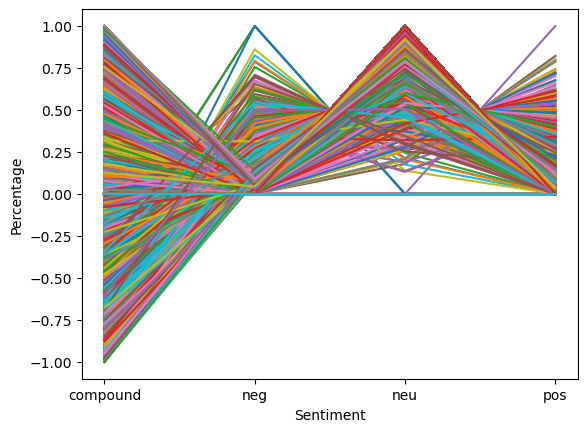

In [123]:
for i in range(0,10710,1):
    z=sid.polarity_scores(hp_paragraphs[i])
    lists=sorted(z.items())
    x, y = zip(*lists)
    plt.plot(x, y)
plt.xlabel("Sentiment")
plt.ylabel("Percentage")

plt.show()

In [126]:
import re
def eda(sentences):
    processed_sentences = []

    for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(s))

        # remove all single characters
        processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

        # Remove single characters from the start
        processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

        # Removing prefixed 'b'
        processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()

        processed_sentences.append(processed_sentence)
        
    return processed_sentences

In [127]:
processed_sentences = eda(hp_sentences)

In [128]:
processed_sentences

[' harry potter and the chamber of secrets by j',
 'k',
 'rowling this is book 2 in the harry potter series original scanned ocr friday april 07 2000 v1 0 edit where needed change version number by 0 1 h p e rr n the worst birthday not for the first time an argument had broken out over breakfast at number four privet drive',
 'mr',
 'vernon dursley had been woken in the early hours of the morning by loud hooting noise from his nephew harry room third time this week he roared across the table',
 ' if you can control that owl it ll have to go harry tried yet again to explain she bored he said',
 ' she used to flying around outside',
 'if could just let her out at night do look stupid snarled uncle vernon bit of fried egg dangling from his bushy mustache',
 ' know what ll happen if that owl let out he exchanged dark looks with his wife petunia harry tried to argue back but his words were drowned by long loud belch from the dursleys son dudley 1 want more bacon there more in the frying pan

In [129]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animeshgiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))
processed_sentences_vectors = vectorizer.fit_transform(processed_sentences).toarray()

In [131]:
processed_sentences_vectors.shape

(21509, 2500)

In [132]:
labels = []
for i in range (21509):
    if(i<5000):
        x=0
    else:
        x=1
    labels.append(x)

In [133]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_sentences_vectors, labels, train_size = 0.8, test_size=0.2, random_state=100)

In [135]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=100)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [136]:
predictions = text_classifier.predict(processed_sentences_vectors[:,:2500])
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [137]:
y_labels = []
for i in range (21509):
    if(i<5000):
        x=0
    else:
        x=1
    y_labels.append(x)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_labels, predictions))
print(classification_report(y_labels, predictions))
print(accuracy_score(y_labels, predictions))

[[ 3879  1121]
 [  120 16389]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5000
           1       0.94      0.99      0.96     16509

    accuracy                           0.94     21509
   macro avg       0.95      0.88      0.91     21509
weighted avg       0.94      0.94      0.94     21509

0.9423032219071087


### Distribution of words in each sentence 

In [139]:
hp_df = pd.DataFrame(processed_sentences, columns = ['Sentence'])
hp_df.head()

Sentence
0       harry potter and the chamber of secrets by j
1                                                  k
2  rowling this is book 2 in the harry potter ser...
3                                                 mr
4  vernon dursley had been woken in the early hou...

Text(0.5, 1.0, 'Distribution of number of words in each sentence')

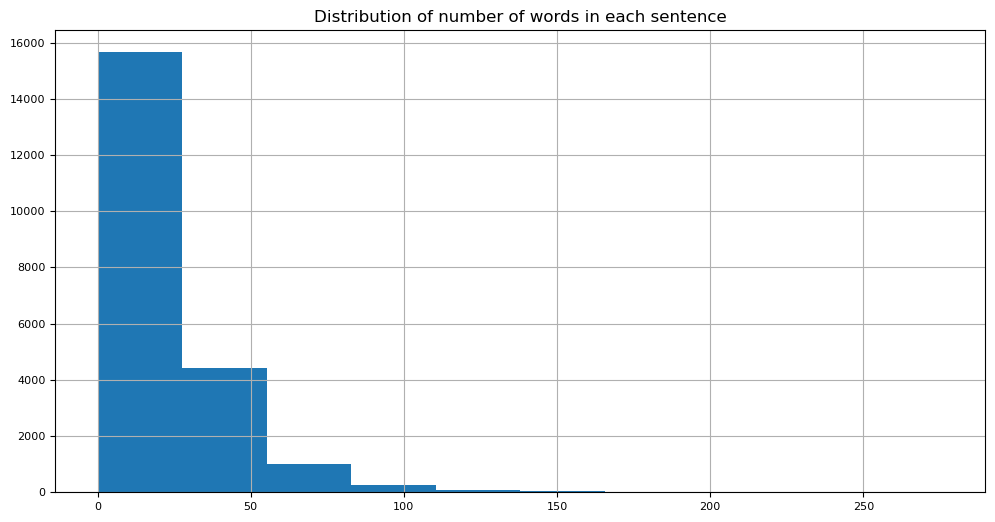

In [140]:
hp_df['NumWords'] = hp_df['Sentence'].apply(lambda x: len(x.split()))
hp_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

In [141]:
stop = stopwords.words('english')

### Removing Specific stopwords

In [142]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = list(STOP_WORDS)
stop_words.append('said')
print(len(stop_words))
print(stop_words)

327
['every', 'five', 'hereupon', 'her', 'none', 'some', 'seems', 'over', 'we', 'three', 'them', 'get', 'bottom', 'neither', 'four', 'whereas', 'amongst', 'hundred', 'hence', "'re", 'along', 'with', 'seeming', 'yours', 'across', 'by', 'nor', 'former', 'namely', 'who', "'ve", "'s", 'where', 'used', 'n’t', 'both', 'nowhere', 'put', 'should', '’s', 'yourselves', 'themselves', 'could', 'ca', 'elsewhere', 'becoming', 'yet', 'now', 'because', 'anyway', 'however', 'what', '‘d', '’d', 'enough', 'even', 'almost', 'again', 'than', 'ten', 'had', 'whereafter', 'cannot', 'us', 'towards', 'since', 'within', 'behind', 'be', 'well', 'say', 'they', 'whom', 'thence', 'above', 'not', 'to', 'hereby', 'one', 'when', 'thus', 'n‘t', 'beyond', 'among', 'sometimes', 'am', '’ve', 'are', 'through', 'somewhere', 'me', 'sometime', 'was', 'while', '‘ve', 'few', 'part', 'most', 'why', 'please', 'therefore', 'just', 'throughout', 'moreover', 'forty', 'hereafter', 'around', 'made', 'until', 'this', 'due', 'were', 'on'

In [143]:
all_sentences = hp_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
all_sentences

0                           harry potter chamber secrets j
1                                                        k
2        rowling book 2 harry potter series original sc...
3                                                       mr
4        vernon dursley woken early hours morning loud ...
                               ...                        
21504    hugged harry tightly saw whispered ear think d...
21505                                          touch harry
21506    harry ron clapping bye harry hermione kissed c...
21507    point worrying told got dursleys car hagrid co...
21508                                                 meet
Name: Sentence, Length: 21509, dtype: object

In [144]:
all_words = ''.join([word for word in all_sentences]).replace('\n', ' ')
all_words

'harry potter chamber secrets jkrowling book 2 harry potter series original scanned ocr friday april 07 2000 v1 0 edit needed change version number 0 1 h p e rr n worst birthday time argument broken breakfast number privet drivemrvernon dursley woken early hours morning loud hooting noise nephew harry room time week roared tablecontrol owl ll harry tried explain boredflying outsidelet night look stupid snarled uncle vernon bit fried egg dangling bushy mustacheknow ll happen owl let exchanged dark looks wife petunia harry tried argue words drowned long loud belch dursleys son dudley 1 want bacon frying pan sweetums aunt petunia turning misty eyes massive sonbuild ve got chancedon like sound school food nonsense petunia went hungry smeltings uncle vernon heartilydudley gets don son dudley large drooped kitchen chair grinned turned harry pass frying pan ve forgotten magic word harry irritably effect simple sentence rest family incredible dudley gasped fell chair crash shook kitchen mrsdur

In [145]:
all_words = ''.join([word for word in all_sentences]).replace("\'", "")
all_words

'harry potter chamber secrets jkrowling book 2 harry potter series original scanned ocr friday april 07 2000 v1 0 edit needed change version number 0 1 h p e rr n worst birthday time argument broken breakfast number privet drivemrvernon dursley woken early hours morning loud hooting noise nephew harry room time week roared tablecontrol owl ll harry tried explain boredflying outsidelet night look stupid snarled uncle vernon bit fried egg dangling bushy mustacheknow ll happen owl let exchanged dark looks wife petunia harry tried argue words drowned long loud belch dursleys son dudley 1 want bacon frying pan sweetums aunt petunia turning misty eyes massive sonbuild ve got chancedon like sound school food nonsense petunia went hungry smeltings uncle vernon heartilydudley gets don son dudley large drooped kitchen chair grinned turned harry pass frying pan ve forgotten magic word harry irritably effect simple sentence rest family incredible dudley gasped fell chair crash shook kitchen mrsdur

### Wordcloud for the text

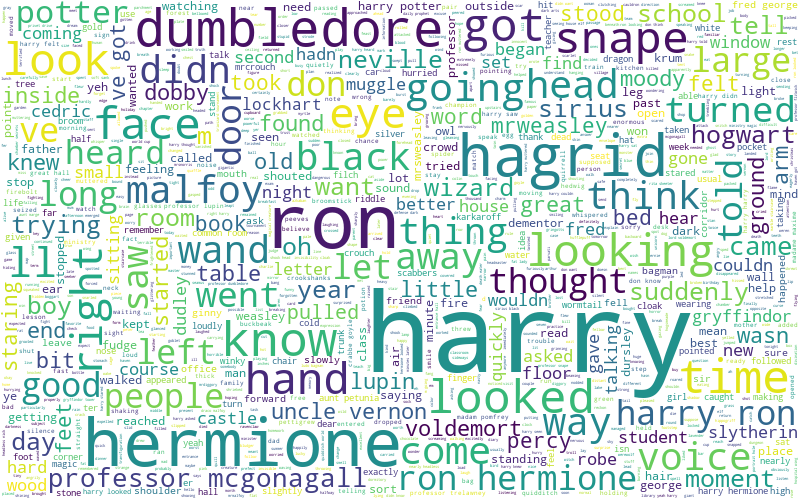

In [146]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [147]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
hp_df['Sentence2'] = all_sentences.apply(normalize_texts)
hp_df.head()
hp_df['Sentence2'] = hp_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

### Occurence of main Different Words in the book

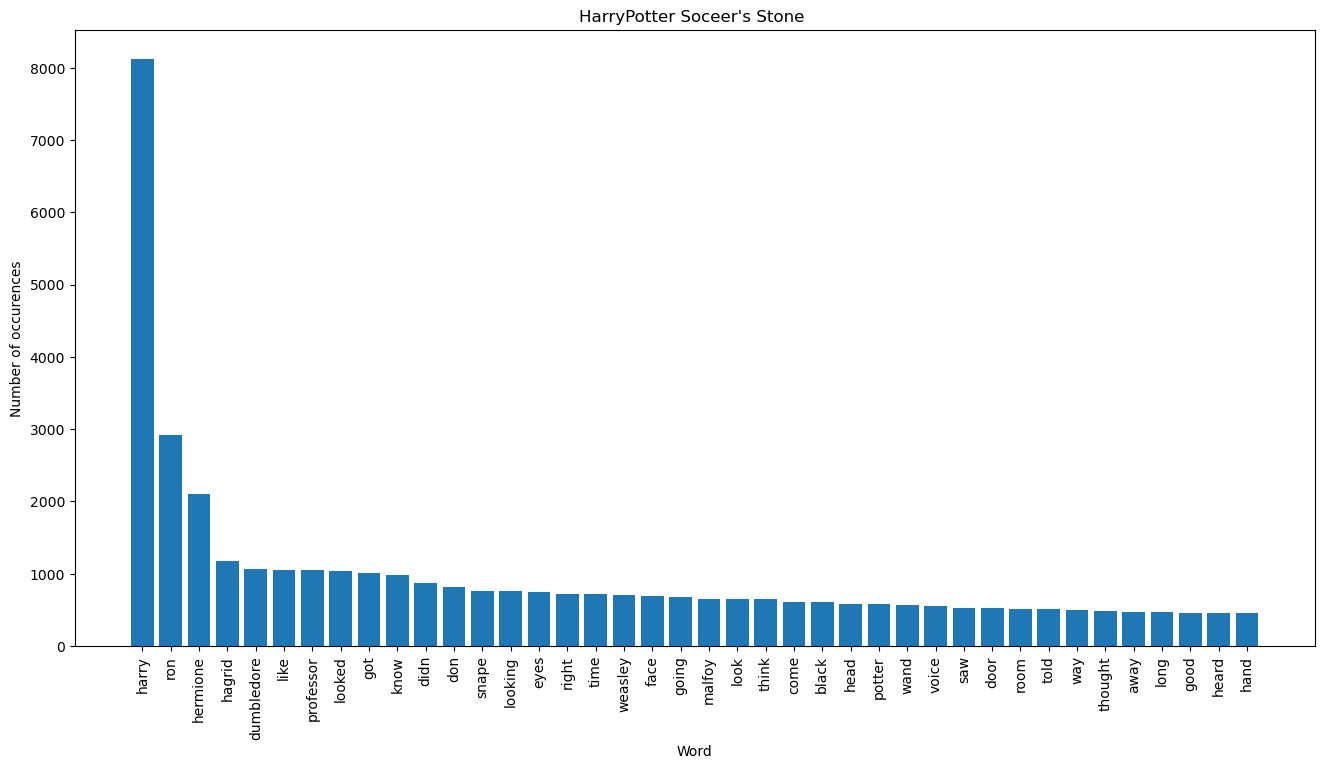

In [148]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(hp_df['Sentence2'], 40):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("HarryPotter Soceer's Stone ");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [149]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process `text` with Spacy NLP Parser
text = '. '.join(all_sentences[:10000])
processed_text = nlp(text)

In [150]:
sentences = [s for s in processed_text.sents]
print(len(sentences))

print(sentences[100:115])

12817
[best spell set fire harry dudley stumbled backward look panic fat face, dad told magic ll chuck house haven got haven got friends jiggery pokery harry fierce voice., hocus pocus squiggly wiggly muuuuuum howled dudley tripping feet dashed house., muuuum know harry paid dearly moment fun., dudley hedge way hurt aunt petunia knew hadn magic duck aimed heavy blow head soapy frying pan., gave work promise wouldn eat finished dudley lolled watching eating ice cream harry cleaned windows washed, car mowed lawn trimmed flowerbeds pruned watered roses repainted garden bench., sun blazed overhead burning neck., harry knew shouldn risen dudley bait dudley thing harry thinking., maybe didn friends hogwarts wish famous harry potter thought savagely spread manure flower beds aching sweat running face half past seven evening exhausted, heard aunt petunia calling walk newspaper harry moved gladly shade gleaming kitchen., fridge stood tonight pudding huge mound whipped cream sugared violets., lo

In [151]:
from collections import Counter, defaultdict

def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(processed_text)[:20])

[('harry', 2696), ('ron', 1072), ('weasley', 204), ('harry ron', 168), ('don', 159), ('yeh', 119), ('harry potter', 79), ('didn', 76), ('harry didn', 61), ('dursley', 49), ('pomfrey', 46), ('dudley', 44), ('malfoy', 42), ('george', 41), ('harry harry', 36), ('dobby', 36), ('couldn', 35), ('ron harry', 34), ('hedwig', 31), ('filch', 28)]


In [152]:
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

character_occurences = get_character_offsets(processed_text)

In [153]:
print(list(character_occurences.keys()))

['harry potter', 'j. k.', 'vernon dursley', 'harry', 'petunia harry', 'don', 'vernon heartily', 'dudley', 'don son', 'dudley large', 'dursley', 'didn mean', 'uncle', 'wasn', 'harry owl hedwig', 'skinny', 'scar hint', 'harry harry', 'harry twelfth birthday', 'vernon harry', 'petunia lounge', 'mrs', 'mason', 'dudley uncle', 'mason dudley', 'ma', 'quidditch harry', 'ron weasley', 'didn miss', 'ron', 'harry point unlocking hedwig', 'cupboard stairs wand broomstick', 'livid', 'eye harry', 'sang dudley', 'day dudley', 'harry dudley', 'backward', 'magic will', 'hocus pocus', 'muuuum', 'soapy', 'mow lawn', 'didn', 'jack', 'honor', 'dobby', 'dobby house', 'rude isn', 'elf hung', 'dobby earnestly', 'sit harry', 'noisy tear sit', 'dobby shake', 'warn leapt', 'dobby don harry', 'dobby bed hedwig', 'dobby speak ill', 'wizard', 'dobby punish', 'dobby shut', 'dobby serve', 'dobby hear', 'dobby know', 'voldemort harry dobby', 'ron painful dobby', 'don belong', 'danger harry', 'plot harry potter', 'plo

In [154]:
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

keywords.most_common(20)

[('harry', 851),
 ('ron', 416),
 ('ve', 289),
 ('don', 145),
 ('people', 107),
 ('didn', 100),
 ('hagrid', 100),
 ('thing', 96),
 ('eye', 95),
 ('lupin', 89),
 ('harry ron', 69),
 ('dumbledore', 68),
 ('snape', 67),
 ('door', 64),
 ('head', 63),
 ('yeh', 63),
 ('professor mcgonagall', 63),
 ('hand', 62),
 ('-PRON-', 61),
 ('wand', 60)]

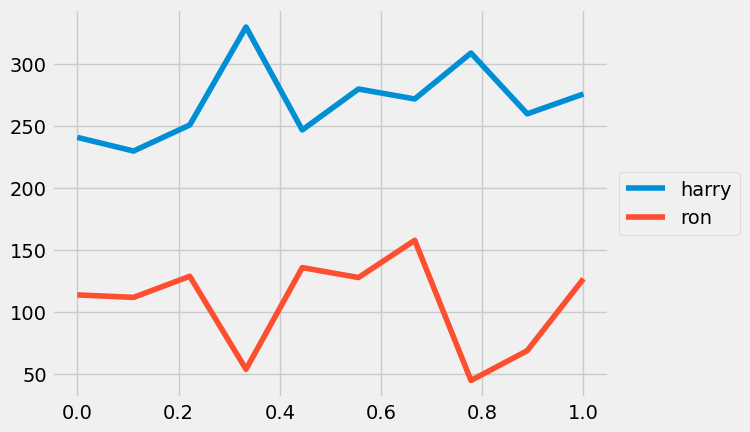

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [character_offsets[character_label] for character_label in character_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot_character_timeseries(character_occurences, ['harry', 'ron'])


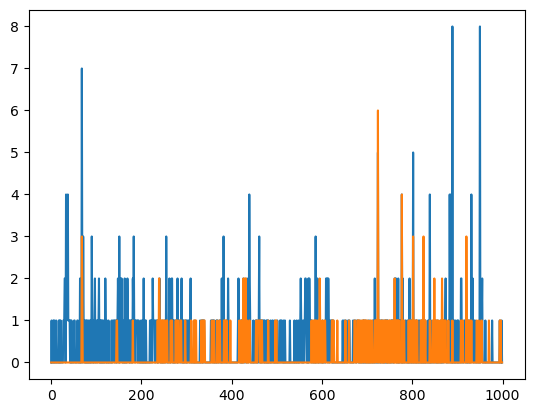

In [156]:
def get_words_paragraphs(paragraphs, words):
    
    word_para = defaultdict(list)
    for p in paragraphs:
        for w in words:
            word_para[w].append(p.count(w))
            
    return dict(word_para)

harry_ron_occurences = get_words_paragraphs(hp_paragraphs[:1000], ['Harry', 'Ron'])
harry_occurences = [v for k,v in harry_ron_occurences.items() if k == 'Harry'][0]
ron_occurences = [v for k,v in harry_ron_occurences.items() if k == 'Ron'][0]

plt.plot(harry_occurences)
plt.plot(ron_occurences)


In [157]:
moral_words = []
with open('mfd2.0.dic', "r") as input:
    pair_lines = input.read().split("\n")
for p in pair_lines:
    moral_words.append(p.split('\t')[0])
print(moral_words[0:11])

['%', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1231.20it/s]


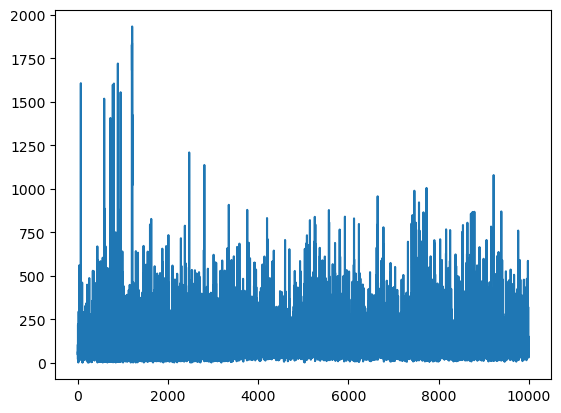

In [158]:
from tqdm import tqdm
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

moral_occurences = get_any_words_paragraphs(hp_paragraphs[:10000], moral_words)
plt.plot(moral_occurences)

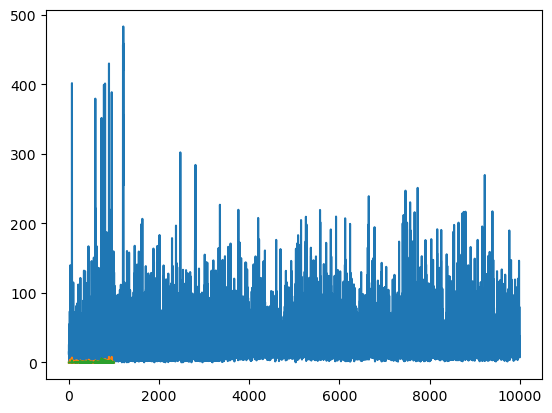

In [159]:
plt.plot([m / 4 for m in  moral_occurences[:10000]])
plt.plot(harry_occurences)
plt.plot(ron_occurences)

In [160]:
bool_harry_occurences = [bool(v) for v in harry_occurences]
bool_ron_occurences = [bool(v) for v in ron_occurences]

In [161]:
df_moral = pd.DataFrame(list(zip(moral_occurences, harry_occurences, ron_occurences)), 
                        columns =['morals', 'harry', 'ron'])
df_moral

morals  harry  ron
0        58      0    0
1        45      1    0
2       104      0    0
3        23      0    0
4        19      0    0
..      ...    ...  ...
995       9      0    0
996      96      0    1
997     170      0    0
998     151      1    0
999      97      0    0

[1000 rows x 3 columns]

In [162]:
import pymc3 as pm

In [163]:
fml = 'morals ~ harry + ron + harry:ron'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral, family=pm.glm.families.NegativeBinomial())
    
    trace = pm.sample(4000, cores=2)

/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, harry:ron, ron, harry, Intercept]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 29 seconds.


In [164]:
import arviz as az

In [165]:
def plot_traces(trcs, var_names=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if var_names is not None:
        nrows = len(var_names)

    ax = az.plot_trace(trcs, var_names=var_names, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             az.summary(trcs,var_names=var_names).iterrows()})

    for i, mn in enumerate(az.summary(trcs, var_names=var_names)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [166]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept', 'harry', 'ron', 'harry:ron', 'mu', 'alpha']

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgir

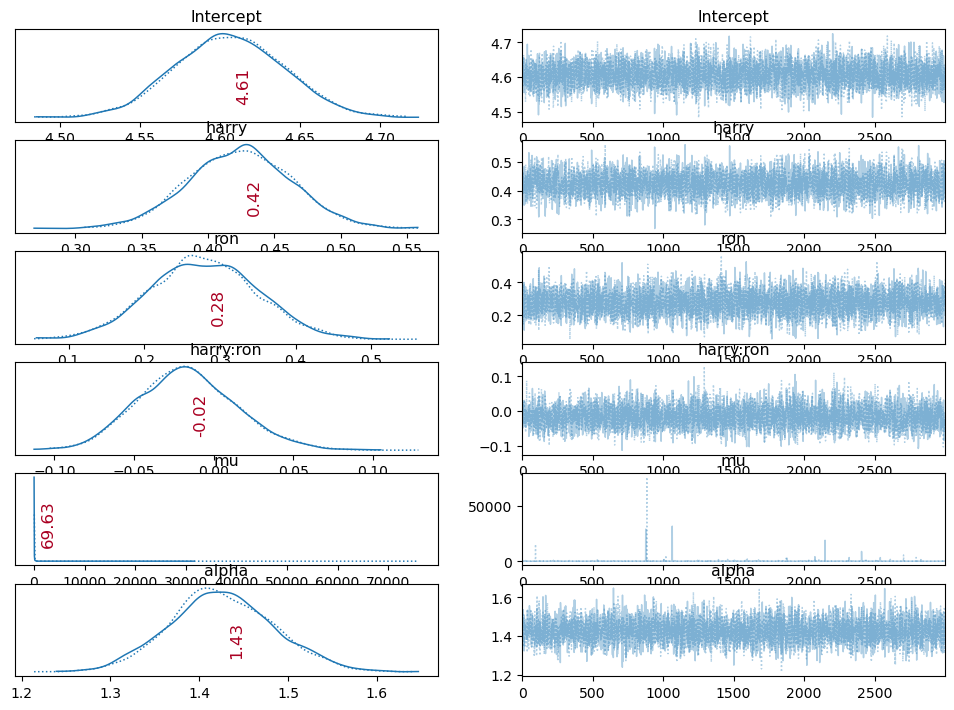

In [167]:
plot_traces(trace[1000:], var_names=rvs);

In [168]:
# Transform coefficients to recover parameter values
np.exp(az.summary(trace[1000:], var_names=rvs))

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean        sd     hdi_3%       hdi_97%     mcse_mean  \
Intercept  1.000830e+02  1.034585  94.254635  1.069114e+02  1.001001e+00   
harry      1.528062e+00  1.039770   1.417649  1.638859e+00  1.001001e+00   
ron        1.321807e+00  1.073581   1.147976  1.497804e+00  1.001001e+00   
harry:ron  9.831437e-01  1.031486   0.929601  1.043938e+00  1.000000e+00   
mu         1.740978e+30       inf   1.005013  1.589240e+44  7.053257e+06   
alpha      4.162018e+00  1.060775   3.750916  4.678605e+00  1.001001e+00   

                mcse_sd  ess_bulk  ess_tail     r_hat  
Intercept      1.000000       inf       inf  2.718282  
harry          1.000000       inf       inf  2.718282  
ron            1.001001       inf       inf  2.718282  
harry:ron      1.000000       inf       inf  2.718282  
mu         69633.426720       inf       inf  2.718282  
alpha          1.001001       inf       inf  2.718282

In [169]:
df_moral2 = pd.DataFrame(list(zip(moral_occurences, bool_harry_occurences, bool_ron_occurences)), 
                        columns =['morals', 'harry_p', 'ron_p'])
df_moral2

morals  harry_p  ron_p
0        58    False  False
1        45     True  False
2       104    False  False
3        23    False  False
4        19    False  False
..      ...      ...    ...
995       9    False  False
996      96    False   True
997     170    False  False
998     151     True  False
999      97    False  False

[1000 rows x 3 columns]

/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


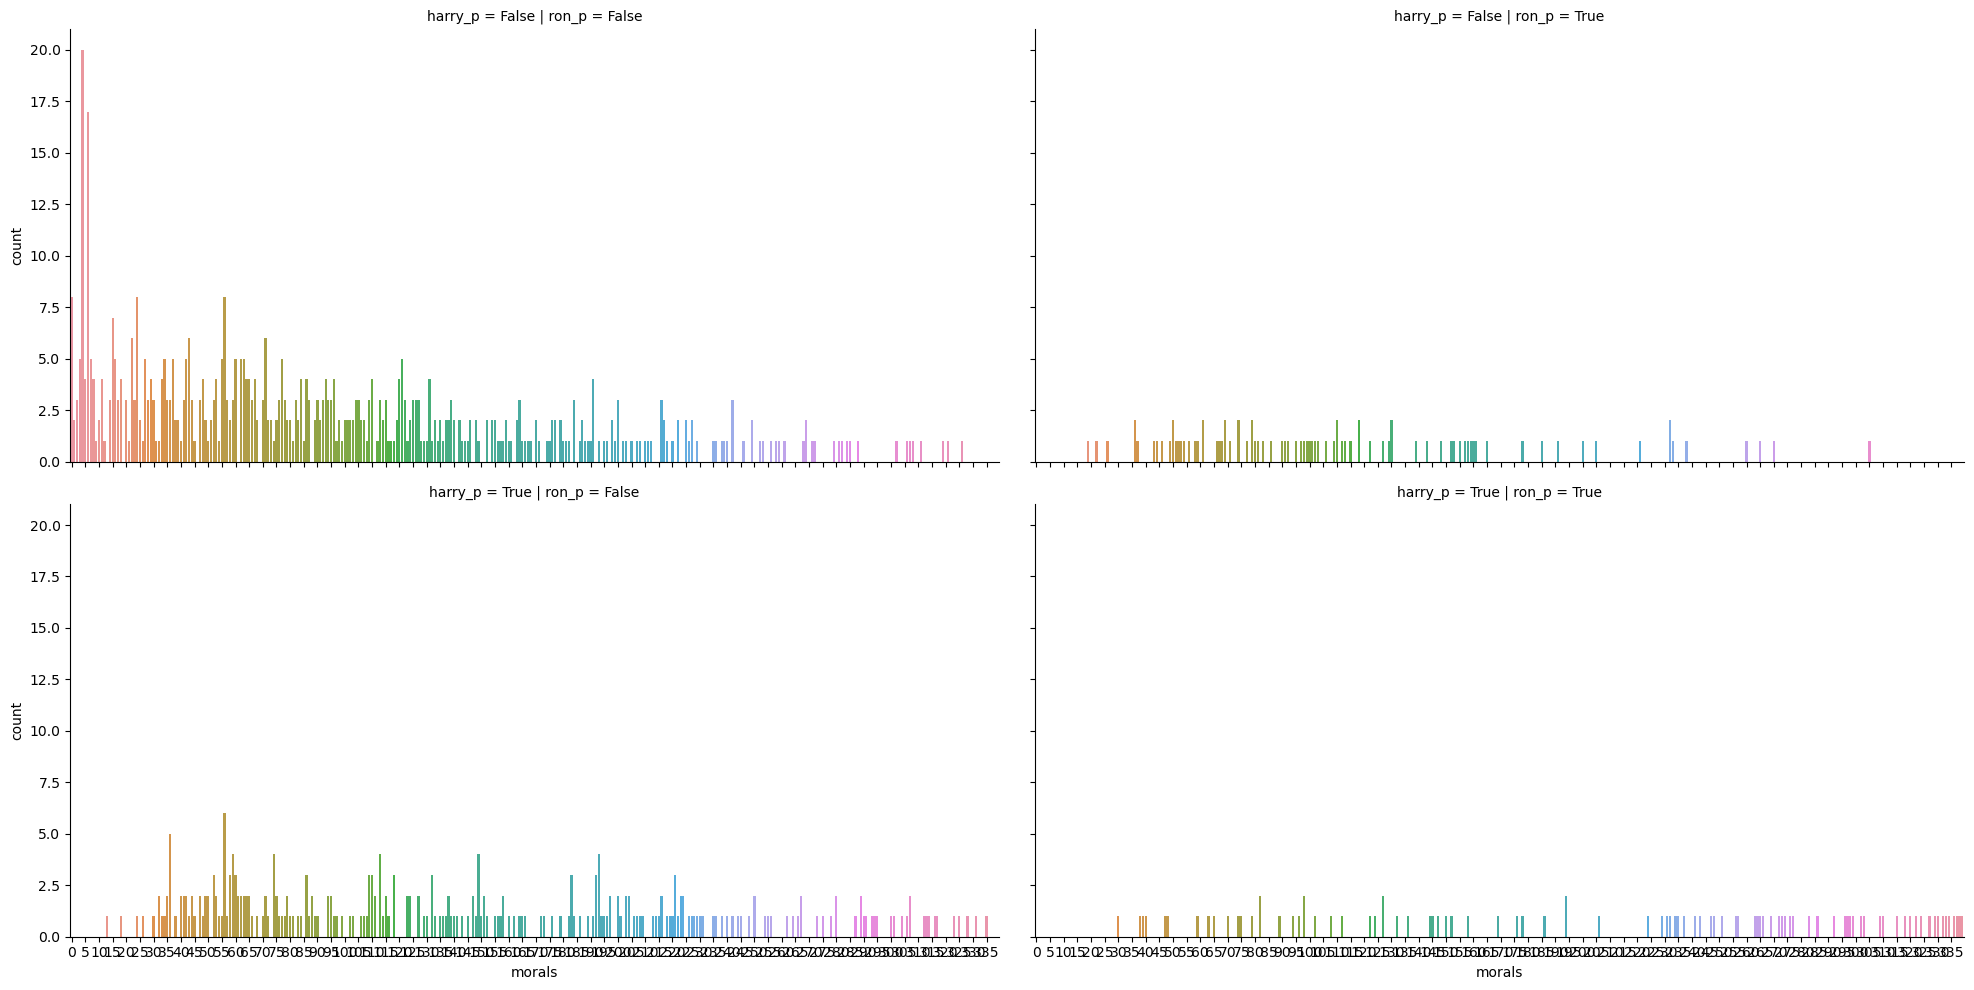

In [170]:
g = sns.factorplot(x='morals', row='harry_p', col='ron_p', data=df_moral2, kind='count', aspect=2)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

In [171]:
df_moral2.groupby(['harry_p', 'ron_p'])['morals'].agg(['mean', 'var'])

mean            var
harry_p ron_p                           
False   False  101.959707    9242.035071
        True   121.218391    6328.451751
True    False  174.552727   24070.153232
        True   347.315217  138049.053392

In [172]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

fml = 'morals ~ harry_p + ron_p + harry_p:ron_p'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral2, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(8000)

/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, mu, harry_p[T.True]:ron_p[T.True], ron_p[T.True], harry_p[T.True], Intercept]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pymc3/math.py:246: RuntimeWarning: divide by zero encountered in log1p
  return np.where(x < 0.6931471805599453, np.log(-np.expm1(-x)), np.log1p(-np.exp(-x)))
Sampling 4 chains for 1_000 tune and 8_000 draw iterations (

Got error No model on context stack. trying to find log_likelihood in translation.


['Intercept', 'harry_p[T.True]', 'ron_p[T.True]', 'harry_p[T.True]:ron_p[T.True]', 'mu', 'alpha']


/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/plots/backends/mat

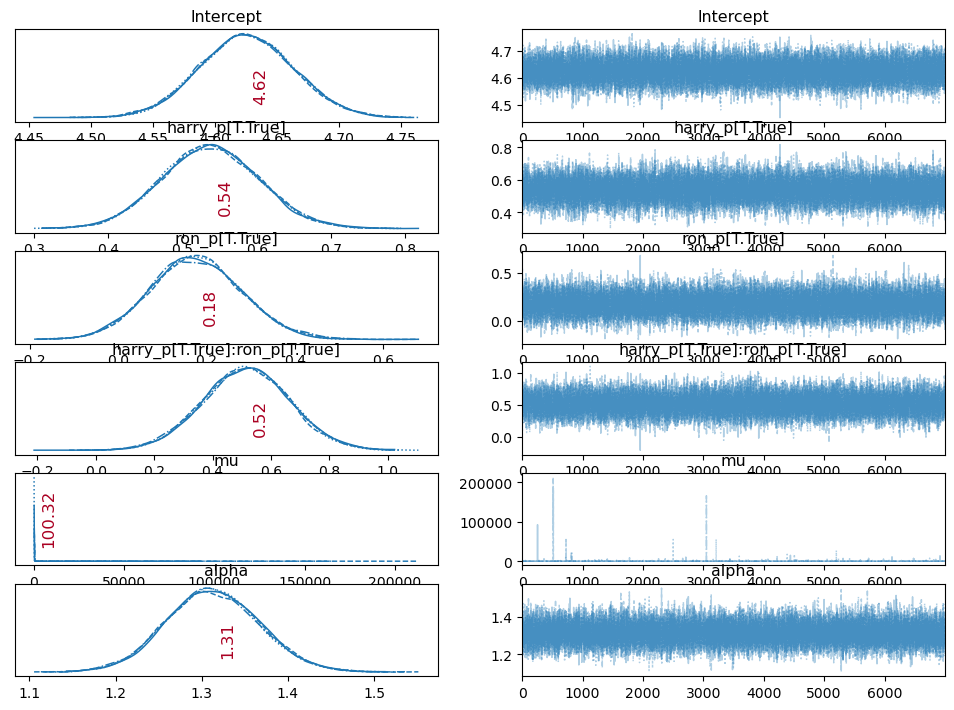

In [173]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
print(rvs)
plot_traces(trace[1000:], var_names=rvs);

In [174]:
np.exp(az.summary(trace[500:], var_names=rvs)[['mean','hdi_3%','hdi_97%']])

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     hdi_3%       hdi_97%
Intercept                      1.020028e+02  95.201910  1.096178e+02
harry_p[T.True]                1.712578e+00   1.505312  1.923218e+00
ron_p[T.True]                  1.192438e+00   0.985112  1.447735e+00
harry_p[T.True]:ron_p[T.True]  1.673639e+00   1.273794  2.225541e+00
mu                             4.368528e+42   1.000000  1.844274e+46
alpha                          3.717309e+00   3.366925  4.116486e+00

In [175]:
trace[1000:]['Intercept'].mean()

4.6254256337483906

In [176]:
trace[1000:]['harry_p[T.True]'].mean()

0.5377079689607736

In [177]:
trace[1000:]['ron_p[T.True]'].mean()

0.17594129574923567

In [178]:
trace[1000:]['harry_p[T.True]:ron_p[T.True]'].mean()

0.5152067955429208

# Text Rank Algorithm

In [179]:
from sentence_transformers import SentenceTransformer

In [180]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

In [181]:
bert_embeddings = bmodel.encode(hp_sentences[:2000])
bert_embeddings.shape

(2000, 384)

In [182]:
for i, (sentence, embedding) in enumerate(zip(hp_sentences[:2000], bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: 
HARRY POTTER AND THE CHAMBER OF SECRETS
by J
Embedding: [-4.93234880e-02  5.36252670e-02 -2.07240693e-02  6.74753962e-03
 -5.44992760e-02  4.73527703e-03  1.01671424e-02 -6.65984973e-02
  1.36869540e-02 -4.78445068e-02 -6.11548498e-02  4.70420942e-02
 -2.91775055e-02 -4.63095214e-03 -3.29879299e-02 -2.05020346e-02
  1.05388174e-02  9.38901678e-02  3.06045972e-02 -6.88970909e-02
  1.85281336e-02 -1.70141144e-03  5.44482246e-02 -4.20237668e-02
  8.34871270e-03  5.95409377e-03  4.61779088e-02  2.93322206e-02
 -7.10249841e-02 -9.95241255e-02 -3.47956754e-02 -8.03491194e-03
 -5.60158603e-02 -5.18047214e-02 -6.29849061e-02 -5.24122342e-02
 -6.49099797e-03  3.61507423e-02  3.41611542e-02 -6.52395794e-03
 -3.52358744e-02  3.72366235e-02 -1.68127827e-02  5.30787669e-02
 -3.71860020e-04  2.21250448e-02 -2.48641409e-02 -3.10840029e-02
 -2.63341572e-02  3.41985188e-02 -7.61241391e-02  1.89457145e-02
 -1.09015003e-01  4.63399850e-02  1.71690751e-02  3.19967978e-02
 -6.49880851e-04  1.541

In [183]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.121609494

In [184]:
bert_embeddings.shape

(2000, 384)

In [185]:
from tqdm import tqdm

M = np.eye(2000)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

2000it [00:53, 37.24it/s]


In [186]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

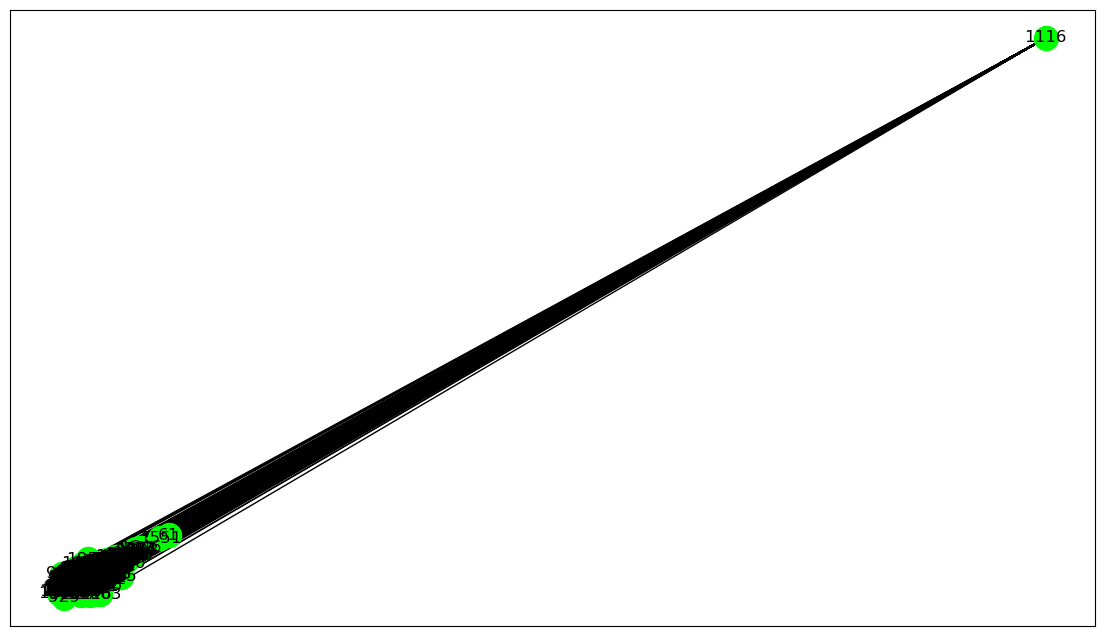

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [188]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.0007379157166608729, 943),
 (0.0007355073292168067, 406),
 (0.0007349476773065155, 894),
 (0.0007327824043521785, 174),
 (0.0007211285239596218, 1467),
 (0.0007176382543918169, 243),
 (0.0007154579388173535, 408),
 (0.0007103266441297198, 206),
 (0.0007064772055979831, 1108),
 (0.0007063833665388329, 1195)]

In [189]:
for i in range(10):
    print(hp_sentences[nx_ranked_sentences[i][1]])
    print('----------')

I will attract your
attention when it is time to pack up.

"Four to a tray - there is a large supply of pots here - compost in the
sacks over there - and be careful of the Venemous Tentacula, it's
teething."

She gave a sharp slap to a spiky, dark red plant as she spoke, making
it draw in the long feelers that had been inching sneakily over her
shoulder.

Harry, Ron, and Hermione were joined at their tray by a curly-haired
Hufflepuff boy Harry knew by sight but had never spoken to.

"Justin Finch-Fletchley," he said brightly, shaking Harry by the hand.
"Know who you are, of course, the famous Harry Potter..
----------
"Just so you could carry on
tinkering with all that Muggle rubbish in your shed! And for your
information, Harry arrived this morning in the car you weren't
intending to fly!"

"Harry?" said Mr
----------
A few
people laughed and, gradually, a babble of talk broke out again.

Hermione closed Voyages with Vampires and looked down at the top
of Ron's head.

* 88

"Well, I d

# LDA (Latent Dirichlet Allocation)

In [190]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [191]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

hp_words = list(sent_to_words(hp_sentences))

In [192]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(hp_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[hp_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[hp_words[0]]])

['harry', 'potter', 'and', 'the', 'chamber', 'of', 'secrets', 'by']


In [193]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [194]:
# Remove Stop Words
hp_words_nostops = remove_stopwords(hp_words)

# Form Bigrams
hp_words_bigrams = make_bigrams(hp_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
hp_lemmatized = lemmatization(hp_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(hp_lemmatized[:2])

[['chamber', 'secret'], []]


In [195]:
# Create Dictionary
id2word = corpora.Dictionary(hp_lemmatized)

# Create Corpus
texts = hp_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])

[[(0, 1), (1, 1)], []]


In [196]:
id2word[0]

'chamber'

In [197]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('chamber', 1), ('secret', 1)], []]

### Building the Topic Model

In [198]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### View the topics in LDA model

In [199]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [200]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.194*"snape" + 0.073*"master" + 0.052*"arrive" + 0.052*"sleep" + '
  '0.049*"far" + 0.041*"care" + 0.040*"drop" + 0.036*"magical" + '
  '0.032*"great_hall" + 0.030*"muggle"'),
 (1,
  '0.100*"time" + 0.056*"die" + 0.043*"course" + 0.043*"thing" + '
  '0.040*"mother" + 0.039*"believe" + 0.039*"remember" + 0.038*"dead" + '
  '0.037*"day" + 0.037*"reach"'),
 (2,
  '0.364*"look" + 0.124*"let" + 0.082*"happen" + 0.058*"place" + 0.051*"walk" '
  '+ 0.034*"move" + 0.032*"spell" + 0.025*"sure" + 0.024*"burn" + '
  '0.020*"notice"'),
 (3,
  '0.202*"eye" + 0.079*"sit" + 0.067*"end" + 0.066*"ear" + 0.062*"later" + '
  '0.047*"little" + 0.044*"second" + 0.041*"touch" + 0.040*"power" + '
  '0.036*"bed"'),
 (4,
  '0.162*"face" + 0.088*"right" + 0.084*"point" + 0.082*"stare" + 0.063*"foot" '
  '+ 0.049*"arm" + 0.047*"night" + 0.043*"black" + 0.027*"pass" + '
  '0.026*"call"'),
 (5,
  '0.379*"try" + 0.062*"explain" + 0.007*"chamber" + 0.000*"dumbledore" + '
  '0.000*"voldemort" + 0.000*"fudge"

In [201]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=hp_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -18.824462990598203

Coherence Score:  0.31568042423488213


### Visualize the topics-keywords

In [202]:
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis
#pyLDAvis.save_html(vis, './output.html')

/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4     -0.148231  0.073126       1        1  9.314267
2     -0.197719 -0.369156       2        1  8.588546
1     -0.141520  0.061562       3        1  8.297468
11    -0.157551  0.094459       4        1  7.767469
15    -0.045270  0.004165       5        1  7.228899
14    -0.037389  0.003040       6        1  6.946864
9     -0.175684  0.186388       7        1  6.264876
3     -0.049853  0.004897       8        1  6.116747
18    -0.007160 -0.000506       9        1  5.492218
10     0.027494 -0.003091      10        1  5.045486
8      0.053527 -0.004410      11        1  4.024528
13     0.085824 -0.005657      12        1  3.932686
6      0.078644 -0.005422      13        1  3.672684
7      0.107688 -0.006140      14        1  3.608750
16     0.080546 -0.005405      15        1  3.283223
0      0.083536 -0.005578      16        1  3.162974
19     0.078512 -0.005323      17        1  3.065539
17     0.093353 -0.005760      18        1  2.957735
5      0.133236 -0.005908      19        1  1.182190
12     0.138019 -0.005279      20        1  0.046852, topic_info=         Term         Freq        Total Category  logprob  loglift
33       look  4673.000000  4673.000000  Default  30.0000  30.0000
44       know  2219.000000  2219.000000  Default  29.0000  29.0000
118      come  2711.000000  2711.000000  Default  28.0000  28.0000
56        get  1997.000000  1997.000000  Default  27.0000  27.0000
373  hermione  2597.000000  2597.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
25        try     0.007528   672.501742  Topic20  -9.1372  -3.7342
26        fly     0.007528   212.228359  Topic20  -9.1372  -2.5809
27    outside     0.007528    55.575545  Topic20  -9.1372  -1.2410
28        bit     0.007528   185.999792  Topic20  -9.1372  -2.4490
29     dangle     0.007528    19.996931  Topic20  -9.1372  -0.2188

[879 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
212       6  0.908574     age
237       4  0.987227     ago
381      12  0.987671   allow
422       4  0.988751  appear
37        9  0.937188   argue
...     ...       ...     ...
53       11  0.996788    word
478      12  0.995667    work
339      12  0.983974  wouldn
250       3  0.990153   write
134       6  0.997132    year

[368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 12, 16, 15, 10, 4, 19, 11, 9, 14, 7, 8, 17, 1, 20, 18, 6, 13])

### Optimizing coherence scores

In [203]:
import mallet

In [204]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    mallet_path = '/Users/animeshgiri/mallet-2.0.8/bin/mallet'
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [205]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=hp_lemmatized, 
                                                        start=2, limit=40, step=6)

Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 106
total tokens: 128051
<10> LL/token: -8.54778
<20> LL/token: -8.45571
<30> LL/token: -8.40365
<40> LL/token: -8.3614

0	25	hermione dumbledore hear hand eye door time leave find open snape feel black pull malfoy good foot head stop stare 
1	25	hermione face start eye turn long head give sit point talk feel time thing stand hogwart voice black boy hand 

<50> LL/token: -8.32527
<60> LL/token: -8.29937
<70> LL/token: -8.27045
<80> LL/token: -8.24618
<90> LL/token: -8.22806

0	25	hermione hand dumbledore hear good eye door snape pull stare feel malfoy room turn foot wand stand floor smile day 
1	25	hermione face head time sit long start people eye point find hogwart turn black leave talk year give boy moment 

<100> LL/token: -8.21343
<110> LL/token: -8.20359
<120> LL/token: -8.19304
<130> LL/token: -8.18357
<140> LL/token: -8.17167

0	25	hermione hand snape good door feel dumbledore turn pull hear stare foot mal

<60> LL/token: -8.84699
<70> LL/token: -8.78593
<80> LL/token: -8.72878
<90> LL/token: -8.6885

0	6.25	eye hand feel black hear arm ground fudge carry hit dobby hair voice dark shake speak scream kill reach year 
1	6.25	good give malfoy hermione find happen hagrid work turn lot smile muggle bit start half feel die friend didn family 
2	6.25	head sit point turn catch wear leg robe close hold open lupin eye large mouth team suddenly small lose raise 
3	6.25	time stop sirius hermione walk night couldn hand black thing face letter sound professor send wand begin bad hurry return 
4	6.25	door hear open foot fall bed move word voice floor loudly stand water man end wall noise sit speak room 
5	6.25	book wizard year great hogwart place student people start run watch hermione tree boy gold magic wand rest large witch 
6	6.25	snape hermione stand talk wait set light pass potion moody time watch thing wave usual listen trouble people chair lie 
7	6.25	dumbledore hermione face step head fire read

<460> LL/token: -8.33014
<470> LL/token: -8.33298
<480> LL/token: -8.33021
<490> LL/token: -8.33235

0	6.25	eye hand black feel face foot ground light long arm hair man forward pull throw air kill fudge tree finger 
1	6.25	time good thing give malfoy happen start turn work didn find bit feel mind dementor friend window remember lot muggle 
2	6.25	head sit large point turn wand hold catch robe pull fly wood leg wear high small shout team cedric seat 
3	6.25	leave stop stare walk night sirius lupin professor_mcgonagall begin win professor moment couldn long suddenly send slowly hard letter laugh 
4	6.25	hear open door voice stand room fall floor speak sound close run move follow step bed reach wall cold water 
5	6.25	year hogwart end school boy book people wizard great student place class find call sort rest crowd bring show champion 
6	6.25	snape talk watch face table day smile bad hermione set suppose break listen wait pass make leave potter people slightly 
7	6.25	hermione dumbledore 

<860> LL/token: -8.29929
<870> LL/token: -8.3012
<880> LL/token: -8.29757
<890> LL/token: -8.30201

0	6.25	eye hand black long foot ground light arm hair feel man forward face raise air tree finger cold dobby nose 
1	6.25	good thing time give feel malfoy turn start happen work didn bit dementor mind remember friend lot muggle half enter 
2	6.25	head large point pull wand hold turn small robe fly wood fire leg wear high hard drop catch team seat 
3	6.25	leave stare stop walk time night sirius suddenly lupin win couldn send professor voldemort slowly window laugh letter lose teacher 
4	6.25	hear open door voice stand room fall floor reach sound close run move follow step bed lie dark hurry speak 
5	6.25	year hogwart find end school boy people book wizard place student class call kill sort rest crowd bring girl champion 
6	6.25	face snape watch table talk day smile wait bad suppose break listen stand pass potter make fudge slightly potion moody 
7	6.25	hermione dumbledore hagrid sit whisp

<160> LL/token: -8.66531
<170> LL/token: -8.64676
<180> LL/token: -8.6263
<190> LL/token: -8.61846

0	3.57143	hermione book student class people leave set run enter half carry cedric suppose champion potion rest change lesson bed climb 
1	3.57143	hermione end turn walk start life good write finish week large show peeve parchment send push pocket dog teacher potter 
2	3.57143	year great hogwart wait voice dementor man time muggle stare pick dursley trouble care inside give hide person tiny stay 
3	3.57143	sound foot throw hand leg catch high speak fire shout wall air step noise forward voice light clear dragon seat 
4	3.57143	wand wizard lupin fall hand stop head begin hard chair scabber rise floor witch glass eye crookshank fast hat heart 
5	3.57143	time feel win bit wood hold sort pass team people scream watch thought crowd yell task finally lot question year 
6	3.57143	open door head pull stand ground reach foot shake follow fly large mouth tree dear light lead car seize floor 
7	3.5

<410> LL/token: -8.48552
<420> LL/token: -8.48381
<430> LL/token: -8.47523
<440> LL/token: -8.48651

0	3.57143	work book school student people class set suppose rest carry potion half champion usual enter add change lesson hour task 
1	3.57143	hermione large turn end start life show write week walk finish peeve parchment push expect pocket free thought evening round 
2	3.57143	year give hogwart great wait man dementor muggle stay pick hide dursley trouble sign small arrive care fact line person 
3	3.57143	foot light sound voice fire leg air high forward seat hit wall cold shout noise throw rise cedric clear dragon 
4	3.57143	wand hold hand fall wizard lupin begin head suddenly run floor chair glass scream scabber stop witch big crookshank mutter 
5	3.57143	time feel point win bit catch wood people pass make lot team crowd drop start gold play buy continue question 
6	3.57143	stand open door head pull reach ground follow fly lie tree foot step lead sight car seize shoulder floor shake 


<660> LL/token: -8.44816
<670> LL/token: -8.44651
<680> LL/token: -8.44317
<690> LL/token: -8.44416

0	3.57143	work book student class suppose set people half rest carry potion champion usual add change lesson school dragon start task 
1	3.57143	hermione large end turn start moment whisper life write week finish make peeve parchment snap pick piece cry expect round 
2	3.57143	year hogwart great wait give muggle sort stay people time dear dursley trouble sign arrive fact continue care line show 
3	3.57143	ground light foot voice sound fire throw leg air high wall seat cold hit cedric water noise rise forward clear 
4	3.57143	hand head wand hold fall wizard lupin run shake raise glass begin scabber arm scream witch forward crookshank desk mutter 
5	3.57143	feel point watch time catch win bit wood pass fly lot drop crowd team notice yell gold play pocket finally 
6	3.57143	stand open door pull reach follow floor step hurry tree foot shoulder lead car sight seize inside climb shut knock 
7

<910> LL/token: -8.45212
<920> LL/token: -8.44156
<930> LL/token: -8.44485
<940> LL/token: -8.44283

0	3.57143	work book school class set suppose wizard student people half rest enter champion potion hour lesson change house add task 
1	3.57143	hermione turn start table end whisper life write finish read peeve parchment snap week mutter pick moment expect bit minute 
2	3.57143	year hogwart great people give wait muggle sort stay dear dursley bring sign arrive care continue witch line power lot 
3	3.57143	foot ground light fire leg air throw high wall seat hit cedric water noise rise spot stone forward thick shoot 
4	3.57143	hand head wand hold fall shake lupin run arm suddenly begin raise glass chair scabber scream forward crookshank desk snake 
5	3.57143	point time win catch fly feel wood watch drop team pass crowd bit gryffindor gold start play manage broom pocket 
6	3.57143	open door stand pull reach follow step hurry room floor walk tree shoulder sight car seize lead head push insi

<110> LL/token: -8.91745
<120> LL/token: -8.88439
<130> LL/token: -8.86116
<140> LL/token: -8.83868

0	2.5	find professor_mcgonagall step wait didn call crowd power stare throw manage answer slytherin glance magical explain remember shadow sound great_hall 
1	2.5	long eye window leg scabber family time hurry throw crookshank draw deep suddenly bag trunk fight start tear tiny seize 
2	2.5	hand voldemort arm drop hard feel wormtail cold scream dursley fire head push sound yell silence eye shut death_eater straight 
3	2.5	year day wood suppose life glass team girl couldn week large idea continue change call school happy save practice fact 
4	2.5	boy kill hold man crouch wall small wizard care forward percy low bed hogwart mouth wide hat return question picture 
5	2.5	dumbledore hogwart dementor thing fudge stop attack mother place school time show break parent die giant young force hear match 
6	2.5	face leave black lie stand turn wizard room finger white move rise bed tonight return dark

<280> LL/token: -8.66523
<290> LL/token: -8.66201

0	2.5	find wait professor_mcgonagall step lose remember lead manage call answer finally glance power great_hall edge understand didn growl shadow time 
1	2.5	long throw leg window scabber stone crookshank draw time deep trunk body fight tiny bag seize sleep clutch carry suddenly 
2	2.5	eye hand arm hard feel voldemort head cold wormtail fire silence shut drop scream cry death_eater mouth straight neck clear 
3	2.5	good year day suppose wood life team week girl glass idea hope call continue remain couldn home match save practice 
4	2.5	boy room man hold kill small percy crouch wall long care corner line forward hang wide ready picture woman hurry 
5	2.5	dumbledore place stop happen school die fudge dead attack mother dementor parent realize question young giant mad fear night escape 
6	2.5	face stand stare leave wizard bed lie teacher people dark white turn cover point tonight darkness heart expression dark_art sharply 
7	2.5	hogwart si

<420> LL/token: -8.59677
<430> LL/token: -8.59885
<440> LL/token: -8.59466

0	2.5	find professor_mcgonagall wait step remember lose didn lead manage finally answer call power glance bring spell magical understand edge stick 
1	2.5	long throw window leg carry scabber stone seize body draw crookshank pocket deep spider trunk loud bag tiny sleep shoulder 
2	2.5	hand eye head arm hard fire voldemort mouth cold wormtail scream drop silence sound shut death_eater blood miss vanish neck 
3	2.5	good year day suppose wood follow team week hope life notice idea happy continue person today home term practice explain 
4	2.5	boy room hold man long kill small percy crouch wall corner hide care ready hang wide thin turn picture woman 
5	2.5	dumbledore stop happen place dementor die fudge dead enter night attack mother live parent tonight question giant young mad school 
6	2.5	face stare people stand lie turn teacher bed leave dark noise white fight heart expression job finger surprise dark_art defens

<560> LL/token: -8.5765
<570> LL/token: -8.57549
<580> LL/token: -8.57464
<590> LL/token: -8.57875

0	2.5	find professor_mcgonagall happen wait remember couldn didn step lead lose call time answer manage power glance bring magical edge spell 
1	2.5	long throw window leg carry shoulder scabber stone suddenly crookshank body pocket deep spider trunk bag loud draw wall clutch 
2	2.5	hand eye head arm hard voldemort finger cold mouth wormtail scream silence red shut cry fire death_eater blood remain touch 
3	2.5	good day year suppose wood win life team girl week hope night idea continue person happy morning match home term 
4	2.5	room boy hold small man kill turn percy crouch corner care hide long ready hang wide woman begin giant round 
5	2.5	dumbledore stop place dementor fudge die dead attack live mother happen parent tonight enter question clear death quiet mad creature 
6	2.5	face stand stare people turn lie teacher noise white dark fight leave picture expression dark_art pink job def

<710> LL/token: -8.54375
<720> LL/token: -8.548
<730> LL/token: -8.55578
<740> LL/token: -8.55532

0	2.5	find happen time wait professor_mcgonagall couldn didn remember lose explain power magical edge spell chance bring understand answer box manage 
1	2.5	long throw leg window carry scabber shoulder stone crookshank draw pocket deep minute bag spider loud trunk seize pair clutch 
2	2.5	hand head shake arm hard voldemort mouth finger wormtail eye scream cold shut death_eater pain remain vanish neck red cry 
3	2.5	good year day win wood life suppose notice girl week hope idea night continue happy match person home morning finally 
4	2.5	room boy hold small man kill percy crouch wall hide corner care long hang turn giant wide woman round funny 
5	2.5	dumbledore place dementor die fudge quietly dead stop attack mother enter live tonight parent question young quiet death mad reason 
6	2.5	face stare turn people stand leave lie teacher white fight noise picture fear surprise expression odd b

<870> LL/token: -8.54317
<880> LL/token: -8.54721
<890> LL/token: -8.53495

0	2.5	time find happen professor_mcgonagall wait couldn remember lose didn manage answer explain power magical chance spell glance understand box search 
1	2.5	long hold window leg throw carry scabber shoulder crookshank draw pocket deep bag spider trunk loud tiny gasp body seize 
2	2.5	hand head shake arm voldemort hard finger mouth cold wormtail scream shut cry death_eater remain miss pain vanish neck pettigrew 
3	2.5	good day win year wood life girl hope week night idea suppose person happy today term match save age memory 
4	2.5	room boy small long man crouch percy wall corner turn hold care hang stone giant woman round hide funny ready 
5	2.5	dumbledore place dementor fudge die dead stop kill attack mother quietly parent tonight live continue question young death quiet mad 
6	2.5	face stare people turn leave stand lie teacher noise white fight real picture surprise expression fear dark_art job defense stay

<10> LL/token: -10.37033
<20> LL/token: -9.93144
<30> LL/token: -9.69836
<40> LL/token: -9.5441

0	1.92308	snape time hogwart stay class school malfoy train place rest room seat young happen strong hagrid suppose professor robe lean 
1	1.92308	night attack write parchment noise bed people boy sirius case funny make piece word lot wrong percy fre life turn 
2	1.92308	long feel sound start year slowly find fact hope snake draw hogwart nervously stone mouth expect form ceiling lot people 
3	1.92308	hermione hair long large point sirius black floor turn pull grab gray sight sit stomach feel giant ghost robe escape 
4	1.92308	good finger leave find owl eye suddenly head potter teacher notice stare walk miss skin arm bludger place hand send 
5	1.92308	good day room hermione tree follow dark spider find smile thing shadow trouble wand fear boy understand couldn surprise touch 
6	1.92308	door malfoy foot hit shout goyle inside fall pocket hand throw hard big lie clutch buckbeak knock stare cra

<160> LL/token: -8.90359
<170> LL/token: -8.87994
<180> LL/token: -8.87281
<190> LL/token: -8.86991

0	1.92308	snape hagrid class leave smile school give stay wouldn professor rest meet pocket train bag carefully platform lesson place hogwart 
1	1.92308	night people lot lose make usual write attack suppose parchment wrong percy show word funny piece desk job manage month 
2	1.92308	sound wormtail move moment crouch expect realize draw stare long snake edge friend tail fact late slowly walk stop watch 
3	1.92308	black long sirius robe hair large glass water pull silver green nod gray escape ghost rip tap seize brightly press 
4	1.92308	hear voice year good walk potter teacher ear finger slytherin clear friend move pair curse miss bottle call notice sound 
5	1.92308	room thing find happen follow tree dark good trouble lead couldn jump spider day inch touch gasp dog fear reason 
6	1.92308	foot malfoy pull fall hit floor yell goyle throw knock hard roll head thick feel shout backward cut c

<310> LL/token: -8.77669
<320> LL/token: -8.76333
<330> LL/token: -8.76758
<340> LL/token: -8.77408

0	1.92308	snape hagrid leave class give professor stay rest lesson wouldn care school train pocket student bag platform meet money magical_creature 
1	1.92308	word lose lot percy speak write attack usual show make parchment people suppose noise funny piece wrong desk month add 
2	1.92308	move wait long stare listen sound wormtail realize crouch expect wasn slowly moment draw snake edge stone friend late watch 
3	1.92308	black long sirius robe hair large glass pull water wear silver man thick short nod nose tall shine sweep press 
4	1.92308	hear voice potter teacher moody ear good sound thought clear friend finger slytherin miss curse pair growl thin dangerous couldn 
5	1.92308	happen good room follow bad thing tree lead find idea trouble spider dog dark touch forest shadow jump inch food 
6	1.92308	foot malfoy pull fall forward shout hit floor seize goyle knock blood roll grab backward 

<460> LL/token: -8.71563
<470> LL/token: -8.7169
<480> LL/token: -8.72563
<490> LL/token: -8.71284

0	1.92308	snape hagrid leave professor class stay give lesson care train rest bag pocket meet student platform easy school wouldn money 
1	1.92308	people word lot night suppose lose percy speak show write attack parchment wrong usual piece funny job quill imagine suggest 
2	1.92308	stare wait move long wormtail crouch watch expect listen stone draw snake wasn friend realize tail loudly remain breath sense 
3	1.92308	black long sirius robe hair pull large wear glass water green silver hat thin man short thick escape tall nod 
4	1.92308	hear voice sound potter moody ear noise clear thought dead speak friend run pair cry finger miss creature dangerous growl 
5	1.92308	happen thing bad dark follow tree room trouble couldn lead find spider leave good dog inch touch idea forest fear 
6	1.92308	foot malfoy pull arm forward shout fall hit seize floor goyle knock jump throw blood roar furiously y

<610> LL/token: -8.68779
<620> LL/token: -8.67622
<630> LL/token: -8.66704
<640> LL/token: -8.66594

0	1.92308	snape hagrid professor class potter leave stay give rest lesson wouldn care train bag school platform student carefully pretend put 
1	1.92308	people word night lose lot percy loudly write show parchment wrong stare thing funny piece win suppose imagine quill suggest 
2	1.92308	stare wait move listen crouch long watch wormtail attack stone expect draw realize snake minute picture angry escape sweep breath 
3	1.92308	black long sirius robe hair pull wear glass water green large man hat thick silver short thin gray tall shine 
4	1.92308	hear voice sound speak moody noise ear thought clear run couldn miss cry dangerous growl scream creature echo sense act 
5	1.92308	leave happen thing dark bad follow tree couldn trouble spider deep dog touch find forest big path fear idea middle 
6	1.92308	foot malfoy fall shout floor forward arm hit pull run seize goyle knock jump roar blood thr

<760> LL/token: -8.67496
<770> LL/token: -8.66636
<780> LL/token: -8.65273
<790> LL/token: -8.6493

0	1.92308	snape hagrid professor class give potter leave wouldn lesson care train bag rest stay loudly pack pretend school platform money 
1	1.92308	people word lose lot night thing write show percy parchment wrong funny piece speak strong sirius son true quill loudly 
2	1.92308	long move wait stare listen crouch watch stone expect realize draw attack wasn snake minute picture lie check tail angry 
3	1.92308	black long robe hair sirius large wear man glass water nose green hat thick thin short silver gray tall shine 
4	1.92308	hear voice sound speak couldn moody noise ear clear thought run dangerous growl scream cry sense echo panic deal soft 
5	1.92308	leave thing happen bad follow dark tree find trouble spider dog inch touch deep forest couldn quiet path grow middle 
6	1.92308	foot malfoy fall shout arm pull forward floor hit seize knock goyle roar run blood throw jump furiously grab b

<910> LL/token: -8.65743
<920> LL/token: -8.65249
<930> LL/token: -8.65359
<940> LL/token: -8.65187

0	1.92308	snape hagrid professor leave class potter wouldn stay give lesson rest care train bag pocket imagine platform pack put money 
1	1.92308	people word lose lot thing percy night show write loudly catch parchment speak wrong piece funny hang quill gaze true 
2	1.92308	wait move long watch crouch attack listen draw begin minute snake picture slowly check expect madame_maxime tail creature sweep breath 
3	1.92308	black long robe sirius hair wear man glass water large green nose short thin small color gray tall line skin 
4	1.92308	hear voice sound speak run moody couldn noise dead clear ear cry miss thought scream growl dangerous deal echo panic 
5	1.92308	happen leave dark bad thing follow find tree trouble big leg couldn spider dog inch forest quiet path shadow grow 
6	1.92308	foot malfoy arm forward shout floor fall hit seize goyle jump blood knock pull run loud furiously grab ba

<60> LL/token: -9.3967
<70> LL/token: -9.31704
<80> LL/token: -9.24473
<90> LL/token: -9.17571

0	1.5625	work thing didn glass wouldn turn set hand potter explain force deep hold free magical expect hermione feel master break 
1	1.5625	dumbledore eye professor_mcgonagall office moody happen stand desk potter finally touch extremely famous sharply growl face hurt school hogwart professor 
2	1.5625	dark turn water stop great inside quickly grow tear pass wall leave finger emerge madame_maxime sound stretch tent remember run 
3	1.5625	long wormtail voice enter arm task give spot suddenly thin egg ground forest white cut show seize skin dear year 
4	1.5625	time hogwart usual good year bit train dear people young hear understand ignore stick lose tall load excellent wear wave 
5	1.5625	sirius lupin professor dementor black teacher give quickly wasn dragon moment dark_art fine tiny make quick difficult defense job horrible 
6	1.5625	wand raise voldemort fall live feel place body low silver r

<160> LL/token: -8.96787
<170> LL/token: -8.94228
<180> LL/token: -8.94159
<190> LL/token: -8.92286

0	1.5625	work didn set wouldn expect glass hold force explain free turn quietly deep broomstick breath master lower potter sir glance 
1	1.5625	dumbledore eye professor_mcgonagall moody office potter desk happen extremely hurt fix touch normal growl mouth finally easy double voice sharply 
2	1.5625	stop dark great water run quickly sound tear inside grow madame_maxime pass emerge tent burst corridor apparently plan peer bathroom 
3	1.5625	long arm leg give wormtail task moment egg seize thin spot inch real furiously cut skin hair dangerous struggle grass 
4	1.5625	time people good bit usual dear lose continue train change push young stick hiss professor_trelawney excellent understand matter birthday load 
5	1.5625	black sirius lupin professor dementor teacher moment dragon give quickly wasn dark_art job creature difficult quick meet defense horrible run 
6	1.5625	wand voldemort fall rai

<260> LL/token: -8.86332
<270> LL/token: -8.86417
<280> LL/token: -8.85065
<290> LL/token: -8.83567

0	1.5625	work didn set wouldn stuff expect break explain force free pair glance broomstick quietly sound cloak realize master nervous sir 
1	1.5625	dumbledore eye professor_mcgonagall potter office moody happen desk touch fix death sharply growl finally normal gaze repeat hurt quietly trust 
2	1.5625	great dark water quickly tear sound inside grow pass madame_maxime emerge stop tent run plan longer burst bathroom sky information 
3	1.5625	long moment arm leg wormtail finish give task seize foot inch thin spot color furiously short egg cut path dangerous 
4	1.5625	time good people bit lose dear usual wave continue professor_trelawney understand excellent matter lord_voldemort doubt reckon properly young innocent afraid 
5	1.5625	black sirius lupin professor dementor teacher quickly give dragon moment sound note creature dark_art job quick difficult wasn azkaban defense 
6	1.5625	wand vol

<360> LL/token: -8.82778
<370> LL/token: -8.81715
<380> LL/token: -8.82134
<390> LL/token: -8.80763

0	1.5625	work didn set break wouldn expect force sound glance free explain pair broomstick hurt breath stuff lower nice hope nervous 
1	1.5625	dumbledore eye professor_mcgonagall potter quietly moody office desk happen touch fix sharply growl normal repeat gaze finally easy disappear surely 
2	1.5625	great dark water meet inside silence pass grow word emerge quickly sound tear forest gasp burst people eagerly plan tent 
3	1.5625	long moment leg arm tree wormtail give task foot dog short spot egg furiously cut path inch tall seize judge 
4	1.5625	time good bit lose people dear idea usual continue pick professor_trelawney eat understand excellent lot reckon lord_voldemort matter bring innocent 
5	1.5625	black sirius lupin professor dementor quickly teacher dragon moment note dark_art box fine case search job deal azkaban defense difficult 
6	1.5625	wand voldemort raise end wall high body 

<460> LL/token: -8.78447
<470> LL/token: -8.78669
<480> LL/token: -8.79757
<490> LL/token: -8.78785

0	1.5625	work didn set break wouldn stuff force hope explain expect free glance pair check hurt broomstick nervous nasty extremely brother 
1	1.5625	dumbledore eye professor_mcgonagall potter quietly moody office desk finally fix crouch growl gaze repeat imagine normal easy sharply happen angry 
2	1.5625	great sound quickly water dark pass grow egg inside emerge thought fine burst people meet point peer tent eagerly apparently 
3	1.5625	arm tree long leg wormtail foot give spot short dog moment inch thick furiously path seize forest tall skin cut 
4	1.5625	time good bit lose people lot dear finish idea pick continue professor_trelawney usual young understand load excellent attention bring mention 
5	1.5625	black sirius lupin professor dementor teacher listen quickly dark_art pettigrew job azkaban deal defense case reason search give difficult move 
6	1.5625	wand voldemort raise wall end

<560> LL/token: -8.76583
<570> LL/token: -8.77437
<580> LL/token: -8.76991
<590> LL/token: -8.7675

0	1.5625	work didn break set expect wouldn force watch explain free glance funny check hurt nervous pair nasty lower stuff brother 
1	1.5625	dumbledore eye professor_mcgonagall office moody quietly potter desk happen fix sharply growl normal repeat professor gaze imagine surely sharp blink 
2	1.5625	great sound water quickly dark stuff egg grow emerge death meet fine pass point tent decide eagerly thought bathroom fit 
3	1.5625	long leg foot tree arm wormtail spot dog short forward ground inch shoulder pull neck forest path follow thick furiously 
4	1.5625	good time bit people lose lot dear ter continue idea finish young pick professor_trelawney pay excellent attention reckon load late 
5	1.5625	black sirius lupin dementor professor teacher give quickly crouch case job pettigrew dark_art box creature deal azkaban reason defense escape 
6	1.5625	wand voldemort raise light end fall body de

<660> LL/token: -8.77116
<670> LL/token: -8.76406
<680> LL/token: -8.76835
<690> LL/token: -8.76263

0	1.5625	work set break didn wouldn stuff watch expect force glance explain free funny check suppose nod pair hope hurt nasty 
1	1.5625	dumbledore professor_mcgonagall stare eye moody office potter quietly desk continue professor fix gaze imagine happen growl normal sharply repeat surely 
2	1.5625	great sound water quickly give egg fine grow decide pass emerge mind burst dark heavily mark peer eagerly panic longer 
3	1.5625	foot leg tree pull wormtail arm forward ground dog long end neck furiously forest gasp path spot cut inch skin 
4	1.5625	good time lot friend bit lose give dear people ter idea professor_trelawney pay attention load young excellent madame_maxime finish reckon 
5	1.5625	black sirius lupin dementor professor teacher crouch thought sound case reason dark_art escape pettigrew creature azkaban search defense job box 
6	1.5625	wand voldemort point raise fall end high body 

<760> LL/token: -8.75585
<770> LL/token: -8.75213
<780> LL/token: -8.76315
<790> LL/token: -8.75762

0	1.5625	work didn break watch set wouldn hope manage explain glance funny check force stuff understand expect nod hurt give nervous 
1	1.5625	dumbledore professor_mcgonagall quietly office eye moody stare continue desk show professor normal fix growl potter sweep sharply repeat gaze busy 
2	1.5625	great mind quickly sound water give egg fine decide grow suddenly emerge tonight put longer bathroom mark sob burst form 
3	1.5625	foot leg arm tree wormtail ground follow spot forward gasp dog pain inch forest short furiously neck pull path cut 
4	1.5625	good time lot people friend bit lose give ter dear idea madame_maxime pay professor_trelawney difficult load finish excellent attention young 
5	1.5625	black sirius lupin dementor professor teacher thought case crouch job box dark_art creature pettigrew escape azkaban defense buckbeak recognize talk 
6	1.5625	wand point voldemort raise end c

<860> LL/token: -8.73912
<870> LL/token: -8.73111
<880> LL/token: -8.73688
<890> LL/token: -8.72708

0	1.5625	work didn time break set wouldn watch hope manage explain glance stuff free check funny nod understand suppose nervous horrible 
1	1.5625	dumbledore professor_mcgonagall stare moody eye office quietly continue fix touch potter desk sharply growl imagine gaze normal repeat doubt surely 
2	1.5625	great mind give water quickly suddenly grow expect egg decide form emerge deal move burst fine completely heavily eagerly bathroom 
3	1.5625	leg foot tree follow ground forward arm gasp dog inch forest neck pain path cut shadow thick pant skin furiously 
4	1.5625	good time give bit friend lot people lose ter idea professor_trelawney finish pay dear load attention attack excellent reckon brother 
5	1.5625	black sirius lupin professor dementor teacher thought crouch fight case dark_art escape pettigrew job box creature buckbeak azkaban defense quickly 
6	1.5625	wand point end voldemort rai

<960> LL/token: -8.73381
<970> LL/token: -8.74436
<980> LL/token: -8.7344
<990> LL/token: -8.73144

0	1.5625	time work didn break watch wouldn show expect explain set glance manage check understand nod suppose hope force funny free 
1	1.5625	dumbledore professor_mcgonagall eye quietly office moody continue clear stare fix desk sharply growl sweep normal imagine touch gaze lord_voldemort smile 
2	1.5625	great give mind water quickly egg grow fine form emerge deal tonight hope burst order heavily mark plan bathroom begin 
3	1.5625	ground foot leg tree forward arm follow gasp dog inch wormtail neck shadow path forest cut pant thick furiously pain 
4	1.5625	good time friend lot give lose ter bit idea finish people professor_trelawney pay dear load attention choose sigh reckon brother 
5	1.5625	black sirius lupin professor dementor teacher quickly fight crouch case thought escape pettigrew creature dark_art job azkaban defense drink search 
6	1.5625	wand point voldemort raise cedric catch e

<60> LL/token: -9.48548
<70> LL/token: -9.39952
<80> LL/token: -9.32518
<90> LL/token: -9.25771

0	1.31579	day bad thing friend week school picture place manage visit dormitory cross arrive piece finger hope carefully winky land idea 
1	1.31579	arm foot point seize hand follow wand robe neck shut roar fall strong stare pocket closely task roll rain slide 
2	1.31579	leave shake room life head whisper question cold smile foot idea evening dear knock worry pull panic wake clutch sound 
3	1.31579	open light door lead car great wide hogwart watch head blue bright stand hear break entrance barely sky drive slowly 
4	1.31579	voice speak sound step fire hear close dark noise walk edge shadow flame madame_maxime small slowly nervously purple strange bar 
5	1.31579	book glass dursley happen family potter office leave stop desk straight give heart fact bottle exam pile chance explain blink 
6	1.31579	snape professor_mcgonagall class potion dementor point gryffindor line thin fight hope expel happ

<160> LL/token: -9.05494
<170> LL/token: -9.03281
<180> LL/token: -9.02712
<190> LL/token: -9.01342

0	1.31579	day bad thing school week arrive word place friend hope visit idea picture enter cross quill eagerly give choose piece 
1	1.31579	hand arm robe seize roll roar head push shut wind foot neck pale strong pocket tightly slide rain dare slam 
2	1.31579	leave head shake room dear stare time question cold sense wake tall panic straight life idea troll stride hastily slight 
3	1.31579	open door car knock wide large darkness bright minute lead couldn blue sky entrance office drive stand direction lie crash 
4	1.31579	hear voice speak sound fire step noise close loud cold echo footstep soft sudden edge pound distant view mention rattle 
5	1.31579	book people glass potter dursley happen fact desk case office usual matter explain bottle drink exam strange pile school leave 
6	1.31579	snape professor_mcgonagall class happen potion gryffindor lesson find dementor fight point true lead thin

<260> LL/token: -8.9419
<270> LL/token: -8.94257
<280> LL/token: -8.9358
<290> LL/token: -8.93112

0	1.31579	school bad day thing hope week enter idea give arrive word grow visit find wake cross choose glance line clock 
1	1.31579	hand arm pull robe seize pocket wave wind roll roar neck finger pale knee slip pain tightly enormous hot dare 
2	1.31579	head leave shake straight stare dear room question slowly cold sense move hide panic tall brother wide fail wake visible 
3	1.31579	open door car lead knock minute fly shut trunk blue darkness lie stand wide sky drive crash large inside squint 
4	1.31579	hear voice sound speak noise loud step word cold echo footstep close soft shadow sudden couldn pack familiar distant rattle 
5	1.31579	book potter people glass dursley desk fact explain case bottle usual change bag strange magical anymore exam pile matter drink 
6	1.31579	snape professor_mcgonagall happen class potion gryffindor lesson common_room rest afternoon true thin double term surely

<360> LL/token: -8.91156
<370> LL/token: -8.89706
<380> LL/token: -8.89952
<390> LL/token: -8.90405

0	1.31579	day bad thing week hope arrive school idea grow visit stay wake give start birthday sign choose clock fit decide 
1	1.31579	hand pull arm robe finger seize pocket roll pain slip wave knee neck roar tightly enormous pale dare wind grip 
2	1.31579	head leave shake room dear straight slowly sense quiet chance stare brother move catch bear bring panic troll bill jump 
3	1.31579	open door car trunk knock fly stand close blue shut lead follow sudden wide darkness drive slam heavy crash sky 
4	1.31579	hear voice speak sound noise loud word couldn step echo footstep make close soft distant familiar shout squint clunk movement 
5	1.31579	book people happen glass dursley desk fact bag case magical drink bottle explain anymore pile single cover today true load 
6	1.31579	snape professor_mcgonagall class potter potion happen common_room gryffindor slytherin lesson rest place lead term dou

<460> LL/token: -8.88296
<470> LL/token: -8.88012
<480> LL/token: -8.87731
<490> LL/token: -8.86351

0	1.31579	day bad thing morning week hope number grow idea wake visit dormitory sign trouble dursley home birthday choose wouldn arrive 
1	1.31579	hand arm robe pull seize roll pocket finger roar slip enormous neck knock knee tightly head pain wave quickly heavy 
2	1.31579	leave head shake slowly dear stare room straight quiet move professor_trelawney brother chance bill troll longer panic visible wink bear 
3	1.31579	open door close car fly follow shut trunk throw cross lead lock slam shout crash drive wing cloud office key 
4	1.31579	hear voice sound speak noise word loud couldn footstep echo ear soft step distant close familiar make thunder faint clunk 
5	1.31579	book glass people desk fact magical bag cover happen dursley remember explain shop case find strange drink usual today pile 
6	1.31579	snape professor_mcgonagall class potter potion rest gryffindor slytherin common_room happ

<540> LL/token: -8.87799
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/animeshgiri/opt/anaconda3/envs/specified/lib/python3.7/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/anime

<560> LL/token: -8.85689
<570> LL/token: -8.86111
<580> LL/token: -8.84567
<590> LL/token: -8.86239

0	1.31579	day thing bad morning week dursley hope trouble happen number expect visit wake home worry arrive birthday dormitory choose grow 
1	1.31579	hand pull arm robe seize pocket head roll slip reach roar pain neck wave knee finger tightly knock slow grip 
2	1.31579	leave head shake slowly dear move room tonight straight professor_trelawney chance stare busy loudly lavender bear staff position nearly_headless hard 
3	1.31579	open door follow fly car close shut trunk throw push lead knock lock slide cross slam office wing crash drive 
4	1.31579	hear voice speak sound noise loud scream word close echo ear footstep panic cry soft step distant make wail rumble 
5	1.31579	book fact usual cover magical large buy explain find case desk bag today learn shop true strange pile enjoy money 
6	1.31579	snape professor_mcgonagall class potter potion rest lesson happen slytherin afternoon gryffindo

<660> LL/token: -8.84175
<670> LL/token: -8.84237
<680> LL/token: -8.83912
<690> LL/token: -8.84101

0	1.31579	day bad thing morning week dursley happen expect arrive hope grow home number chapter wake visit breakfast worry birthday story 
1	1.31579	pull arm hand robe seize pocket leg slip roll reach pain finger neck wave knee knock roar tightly grab heavy 
2	1.31579	head leave shake slowly room dear stare straight move busy lie bear nervously bill fleur lavender silently staff jerk hard 
3	1.31579	open door close car follow push trunk fly reach shut office cross move lock slide slam drive bar bark bend 
4	1.31579	hear voice speak sound noise scream loud ear echo footstep sense panic soft familiar distant word nearby wail movement bertha_jorkin 
5	1.31579	book desk usual large magical today buy cover minute fact explain strange shop learn bag true exam pile money bind 
6	1.31579	snape professor_mcgonagall class potter potion lesson moment rest gryffindor slytherin difficult imagine tea

<760> LL/token: -8.84229
<770> LL/token: -8.8525
<780> LL/token: -8.84796
<790> LL/token: -8.84447

0	1.31579	day thing bad morning week dursley expect hope number happen wake chapter sign breakfast grow visit age home birthday clock 
1	1.31579	pull hand arm robe seize leg pocket neck pain knee roll finger tightly slip lift struggle wave grab head roar 
2	1.31579	head leave shake slowly stare room dear straight ear busy lavender silently bill quiet bear beat ugly jerk nearly_headless position 
3	1.31579	open door close car follow push fly trunk shut mouth knock reach lean cross office lock slide pull bar drive 
4	1.31579	hear voice speak sound noise scream word loud echo footstep sense soft sudden familiar distant panic faint reason clunk movement 
5	1.31579	book large desk bag usual buy magical fact gold today learn minute manage small pile exam shop professor_flitwick study money 
6	1.31579	snape professor_mcgonagall class potter potion lesson happen gryffindor teacher rest afternoon

<860> LL/token: -8.8403
<870> LL/token: -8.84801
<880> LL/token: -8.83601
<890> LL/token: -8.8261

0	1.31579	thing day bad happen morning week expect hope dursley number visit wake chapter breakfast home birthday ago tomorrow age early 
1	1.31579	pull arm hand robe leg seize pocket finger pain neck knee grab reach roll knock tightly heavy shriek slip stretch 
2	1.31579	head leave shake slowly ear room straight clear quiet move beat jerk faint jump bill ugly lavender busy nearly_headless staff 
3	1.31579	open door close reach car fly push mouth trunk follow shut lock cross office knock slam slide view drive lean 
4	1.31579	hear voice speak sound noise loud word scream sudden echo sense footstep panic enter ahead dare distant fudge soft angry 
5	1.31579	book large gold bag magical buy today usual cover manage desk shop learn box fact pile money difficult study monster 
6	1.31579	snape professor_mcgonagall class potter potion happen rest lesson follow afternoon gryffindor teacher double d

<960> LL/token: -8.8193
<970> LL/token: -8.82308
<980> LL/token: -8.82643
<990> LL/token: -8.80706

0	1.31579	day thing bad happen morning hope dursley week number wake expect chapter home breakfast age mention meet tomorrow exam ago 
1	1.31579	hand pull arm robe leg seize reach pocket pain neck head roll grab knee heavy tightly finger knock lift struggle 
2	1.31579	head leave shake room ear slowly straight clear jump nervously crack jerk faint whisper throat bill fleur lavender nearly_headless giggle 
3	1.31579	open door close fly car mouth push shut trunk reach office pull lock slide disappear voice cross knock view slam 
4	1.31579	hear voice sound speak noise low loud scream word loudly sudden echo footstep soft angry ahead familiar distant thunder rumble 
5	1.31579	book buy magical gold bag today minute usual box learn pick shop difficult fact manage large spell pile remind monster 
6	1.31579	snape professor_mcgonagall class potter follow potion happen rest lesson desk afternoon do

In [206]:
limit=40; start=2; step=6;
x = range(start, limit, step)

In [207]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.19
Num Topics = 8  has Coherence Value of 0.3493
Num Topics = 14  has Coherence Value of 0.3502
Num Topics = 20  has Coherence Value of 0.3298
Num Topics = 26  has Coherence Value of 0.3362
Num Topics = 32  has Coherence Value of 0.3377
Num Topics = 38  has Coherence Value of 0.3281


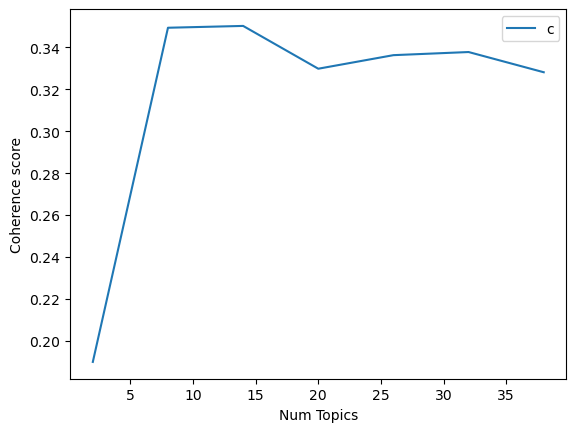

In [208]:
# Show graph

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [209]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.050*"eye" + 0.042*"hand" + 0.033*"black" + 0.029*"long" + 0.024*"foot" + '
  '0.018*"ground" + 0.015*"light" + 0.015*"arm" + 0.013*"shake" + '
  '0.013*"hair"'),
 (1,
  '0.036*"time" + 0.032*"good" + 0.029*"thing" + 0.027*"feel" + 0.023*"malfoy" '
  '+ 0.022*"start" + 0.022*"give" + 0.020*"turn" + 0.019*"happen" + '
  '0.018*"work"'),
 (2,
  '0.030*"head" + 0.025*"large" + 0.024*"point" + 0.022*"pull" + 0.021*"wand" '
  '+ 0.020*"turn" + 0.020*"hold" + 0.014*"small" + 0.014*"robe" + '
  '0.013*"catch"'),
 (3,
  '0.035*"leave" + 0.026*"stare" + 0.023*"walk" + 0.023*"stop" + 0.018*"find" '
  '+ 0.017*"moment" + 0.016*"night" + 0.016*"sirius" + 0.015*"lupin" + '
  '0.015*"win"'),
 (4,
  '0.043*"hear" + 0.030*"open" + 0.029*"door" + 0.025*"voice" + 0.025*"stand" '
  '+ 0.019*"room" + 0.018*"fall" + 0.015*"floor" + 0.015*"reach" + '
  '0.015*"sound"'),
 (5,
  '0.026*"year" + 0.023*"hogwart" + 0.019*"people" + 0.019*"end" + '
  '0.019*"school" + 0.019*"boy" + 0.018*"find" + 0.016*"

### Finding the dominant topic in each sentence

In [210]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=hp_sentences):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=hp_sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             4.0              0.1587   
1            1             0.0              0.1250   
2            2             1.0              0.1636   
3            3             0.0              0.1250   
4            4             3.0              0.1595   
5            5             7.0              0.1422   
6            6             2.0              0.1422   
7            7             1.0              0.1447   
8            8             1.0              0.1469   
9            9             7.0              0.1394   

                                            Keywords  \
0  hear, open, door, voice, stand, room, fall, fl...   
1  eye, hand, black, long, foot, ground, light, a...   
2  time, good, thing, feel, malfoy, start, give, ...   
3  eye, hand, black, long, foot, ground, light, a...   
4  leave, stare, walk, stop, find, moment, night,...   
5  hermione, dumbledore, sit, hagrid, great, whis...   
6  head, large, point, pull, wand, turn, hold, sm...   
7  time, good, thing, feel, malfoy, start, give, ...   
8  time, good, thing, feel, malfoy, start, give, ...   
9  hermione, dumbledore, sit, hagrid, great, whis...   

                                                Text  
0    \nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J  
1                                                  K  
2  Rowling\n\n(this is BOOK 2 in the Harry Potter...  
3                                                 Mr  
4  Vernon Dursley had been woken in\nthe early ho...  
5  "If you can't\ncontrol that owl, it'll have to...  
6               "She's used to flying around outside  
7  If I could\njust let her out at night -"\n\n"D...  
8  "I know what'll happen if that owl's let\nout....  
9  "We must build you up while\nwe've got the cha...

### Find the most representative document for each topic

In [211]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.3670   
1        1.0              0.2586   
2        2.0              0.4189   
3        3.0              0.2417   
4        4.0              0.2989   

                                            Keywords  \
0  eye, hand, black, long, foot, ground, light, a...   
1  time, good, thing, feel, malfoy, start, give, ...   
2  head, large, point, pull, wand, turn, hold, sm...   
3  leave, stare, walk, stop, find, moment, night,...   
4  hear, open, door, voice, stand, room, fall, fl...   

                                                Text  
0  He heard Hermione shriek with pain and fall\nt...  
1  Blocks of ice cream in every flavor you\ncould...  
2  The Quidditch season was approaching, and O1iv...  
3   She took the newspaper, scanned the first few...  
4  With a tiny hint of sarcasm\nin his voice, he ...

### Topic distribution across documents

In [212]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

Dominant_Topic                                     Topic_Keywords  \
0.0                 4.0  hear, open, door, voice, stand, room, fall, fl...   
1.0                 0.0  eye, hand, black, long, foot, ground, light, a...   
2.0                 1.0  time, good, thing, feel, malfoy, start, give, ...   
3.0                 0.0  eye, hand, black, long, foot, ground, light, a...   
4.0                 3.0  leave, stare, walk, stop, find, moment, night,...   
...                 ...                                                ...   
21504.0             7.0  hermione, dumbledore, sit, hagrid, great, whis...   
21505.0             0.0  eye, hand, black, long, foot, ground, light, a...   
21506.0             1.0  time, good, thing, feel, malfoy, start, give, ...   
21507.0             1.0  time, good, thing, feel, malfoy, start, give, ...   
21508.0             0.0  eye, hand, black, long, foot, ground, light, a...   

         Num_Documents  Perc_Documents  
0.0             6630.0          0.3082  
1.0             2654.0          0.1234  
2.0             2068.0          0.0961  
3.0             2222.0          0.1033  
4.0             2142.0          0.0996  
...                ...             ...  
21504.0            NaN             NaN  
21505.0            NaN             NaN  
21506.0            NaN             NaN  
21507.0            NaN             NaN  
21508.0            NaN             NaN  

[21509 rows x 4 columns]

## --End-- ##